In [2]:
# set path
rootdir = '/Users/rj/'
import os,sys
# append the path where your scripts are
sys.path.append(rootdir+"soft/python/") 
# import your own packages
from universal import *
plot_conf()

workdir = '/Users/rj/Fellow-CERN/SAD/ATF2/Wake/FromPierre/'
os.chdir(workdir)
import scipy;
from scipy.integrate import quad, dblquad
import ipywidgets

from matplotlib.ticker import AutoMinorLocator
import os
import glob

import scipy.optimize

In [11]:
def func_intensity(x, a, b):
    return sqrt((a*x)**2 + b)

In [12]:
# both are w/ fake optics correction at the IP
dat0=loadtxt('Data/Case1/ATF2_ultra_low_intensity_dep_param_knobs.dat')
cur_wo_corr, sigy_wo_corr=transpose(dat0)

dat0=loadtxt('Data/Case2/ATF2_ultra_low_intensity_dep_param_knobs_wake_mover.dat')
cur_w_corr, sigy_w_corr=transpose(dat0)

In [15]:
# fit
fit_para1, pcov = scipy.optimize.curve_fit(func_intensity, cur_wo_corr*1e-9, sigy_wo_corr)
fit_err1 = sqrt(diag(pcov))

fit_para2, pcov = scipy.optimize.curve_fit(func_intensity, cur_w_corr*1e-9, sigy_w_corr)
fit_err2 = sqrt(diag(pcov))
np_1=linspace(0.01, 10, 50) # unit, 1e9

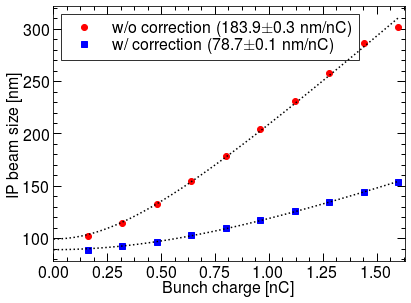

In [32]:
fig=plt.figure()
plt.plot(cur_wo_corr*1.6e-10, sigy_wo_corr, 'o', label=r'w/o correction (%.1f$\pm$%.1f nm/nC)'%(fit_para1[0]/0.16, fit_err1[0]))
plt.plot(np_1*0.16, func_intensity(np_1, *fit_para1), 'k:')
plt.plot(cur_w_corr*1.6e-10, sigy_w_corr, 's', label=r'w/ correction (%.1f$\pm$%.1f nm/nC)'%(fit_para2[0]/0.16, fit_err2[0]))
plt.plot(np_1*0.16, func_intensity(np_1, *fit_para2), 'k:')
plt.xlabel('Bunch charge [nC]')
plt.ylabel('IP beam size [nm]')
plt.xlim(0, 1.63)
plt.legend(loc='best')

fig.tight_layout()
plt.show()
fig.savefig('./figure/intensity_dep_placet_ul_June2019Orbit_v0.pdf')

In [33]:
22.5/0.16

140.625

In [49]:
sigyy=sqrt(12e-12/30e-6)
w2=sigyy*0.3*0.1*1e6
print(w2/0.16)
w1=8.8
sqrt(w2**2+w1**2)/0.16

118.58541225631424


130.71916462401373